<a href="https://colab.research.google.com/github/lucasm-paixao/analise_preditiva/blob/main/projeto_analise_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📦 Cenário: Loja Online de Eletrônicos
Período: Janeiro a Dezembro de 2024

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.4 MB/s eta 0:00:00


In [2]:
import pandas as pd

Entendimento dos Dados

In [3]:
df = pd.read_csv("/content/drive/MyDrive/portfólio_dados/dataset_loja_online.csv", sep=';')

# Ver as primeiras linhas
df.head()

,id_pedido,data_pedido,id_cliente,nome_cliente,cidade,estado,categoria_produto,nome_produto,quantidade,preco_unitario,preco_total,tipo_pagamento,dias_entrega,nota_avaliacao
0,ORD10000,2024-12-25,C2679,João Guilherme da Cruz,Carvalho,SC,Áudio,Caixa JBL,1,5203.78,5203.78,Pix,4,3
1,ORD10001,2024-06-11,C4582,Dra. Aurora Pastor,Andrade do Sul,AP,Áudio,Echo Dot 5,1,4153.92,4153.92,Cartão de Crédito,1,1
2,ORD10002,2024-07-24,C9928,Amanda Novais,Silva,RS,Gamers,Controle Gamer,1,3950.65,3950.65,Boleto,12,4
3,ORD10003,2025-01-16,C3615,Hellena Machado,Abreu da Serra,RR,Notebooks,MacBook Air,5,1983.43,9917.15,Pix,14,1
4,ORD10004,2024-10-06,C2519,Eduardo Cunha,Caldeira de Minas,MG,TVs,"LG OLED 48""",3,1130.58,3391.74,Boleto,13,3


In [4]:
# Informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_pedido          1000 non-null   object 
 1   data_pedido        1000 non-null   object 
 2   id_cliente         1000 non-null   object 
 3   nome_cliente       1000 non-null   object 
 4   cidade             1000 non-null   object 
 5   estado             1000 non-null   object 
 6   categoria_produto  1000 non-null   object 
 7   nome_produto       1000 non-null   object 
 8   quantidade         1000 non-null   int64  
 9   preco_unitario     1000 non-null   float64
 10  preco_total        1000 non-null   float64
 11  tipo_pagamento     1000 non-null   object 
 12  dias_entrega       1000 non-null   int64  
 13  nota_avaliacao     1000 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 109.5+ KB


In [5]:
# Estatísticas básicas
df.describe()

,quantidade,preco_unitario,preco_total,dias_entrega,nota_avaliacao
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,3.018000,3358.480610,10337.736610,8.1510,3.805000
std,1.428887,2022.653869,8547.133817,4.2429,1.154256
min,1.000000,50.640000,50.640000,1.0000,1.000000
25%,2.000000,1585.932500,3400.312500,5.0000,3.000000
50%,3.000000,3253.510000,7905.610000,8.0000,4.000000
75%,4.000000,5088.250000,16061.122500,12.0000,5.000000
max,5.000000,6981.410000,34748.950000,15.0000,5.000000


Limpeza e Preparação dos Dados

In [6]:
df['data_pedido'] = pd.to_datetime(df['data_pedido'])

In [7]:
df['mes'] = df['data_pedido'].dt.month
df['ano'] = df['data_pedido'].dt.year
df['mes_ano'] = df['data_pedido'].dt.to_period('M')

Vendas Totais

In [8]:
df['preco_total_formatado'] = df['preco_total'].apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))

In [9]:
total = df['preco_total'].sum()
total_formatado = f"R$ {total:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
print(total_formatado)

R$ 10.337.736,61


Faturamanto por mês

<Axes: title={'center': 'Faturamento Mensal'}, xlabel='mes_ano'>

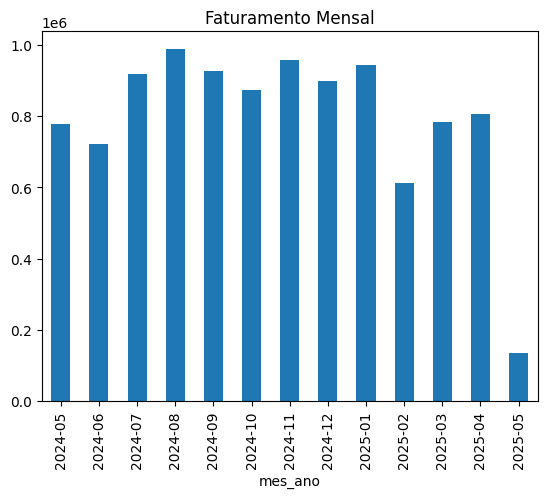

In [10]:
df.groupby('mes_ano')['preco_total'].sum().plot(kind='bar', title='Faturamento Mensal')

Vendas por Categoria

<Axes: title={'center': 'Faturamento por Categoria'}, ylabel='categoria_produto'>

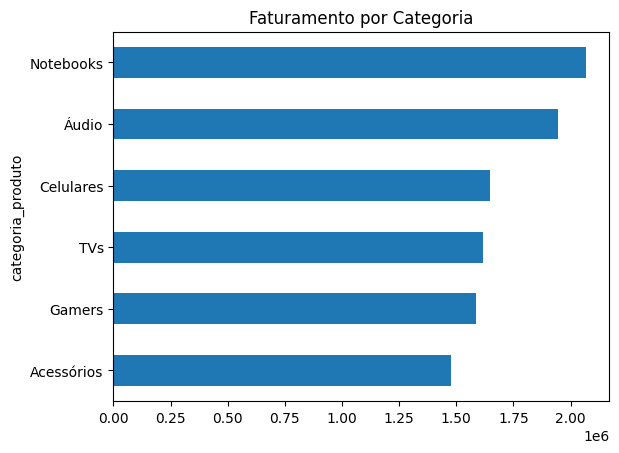

In [11]:
df.groupby('categoria_produto')['preco_total'].sum().sort_values().plot(kind='barh', title='Faturamento por Categoria')

Ticket médio

In [12]:
df['preco_total'].mean()

np.float64(10337.73661)

Produtos mais vendidos

In [13]:
df.groupby('nome_produto')['quantidade'].sum().sort_values(ascending=False).head(10)

,quantidade
nome_produto,
MacBook Air,209
Samsung Galaxy S22,209
Caixa JBL,203
"LG OLED 48""",200
"TCL 50""",183
Echo Dot 5,181
Controle Gamer,181
Fone Bluetooth,180
Acer Aspire 5,179


Vendas por estado ou cidade

<Axes: xlabel='estado'>

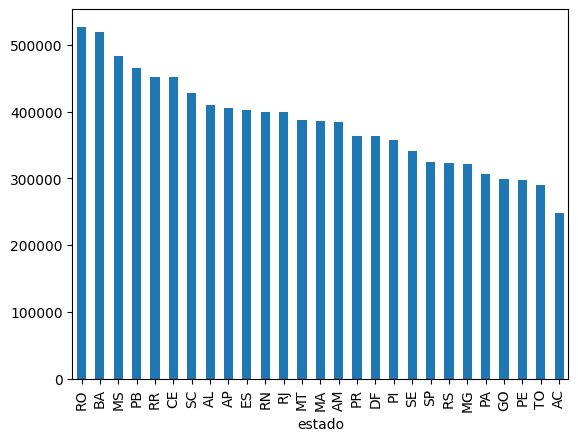

In [14]:
df.groupby('estado')['preco_total'].sum().sort_values(ascending=False).plot(kind='bar')

Média de avaliação por categoria

In [15]:
df.groupby('categoria_produto')['nota_avaliacao'].mean().sort_values(ascending=False)

,nota_avaliacao
categoria_produto,
Áudio,3.943590
TVs,3.808383
Celulares,3.802548
Acessórios,3.778571
Gamers,3.762821
Notebooks,3.713514


Relação entre dias de entrega e avaliação

In [16]:
df[['dias_entrega', 'nota_avaliacao']].corr()
#Isso retorna uma matriz de correlação entre as colunas dias_entrega e nota_avaliacao.
#Se o valor for negativo, por exemplo –0.3, significa que quanto maior o tempo de entrega, menor tende a ser a nota (possível insatisfação do cliente).

,dias_entrega,nota_avaliacao
dias_entrega,1.000000,0.001317
nota_avaliacao,0.001317,1.000000


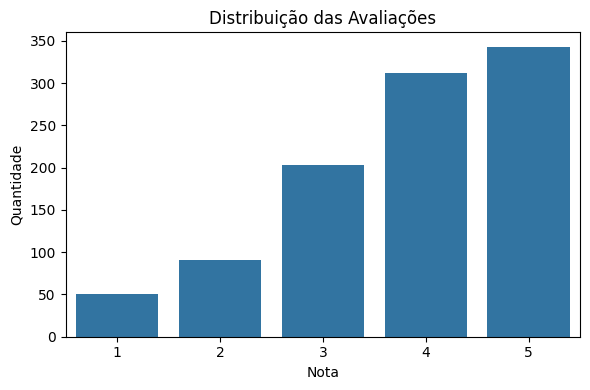

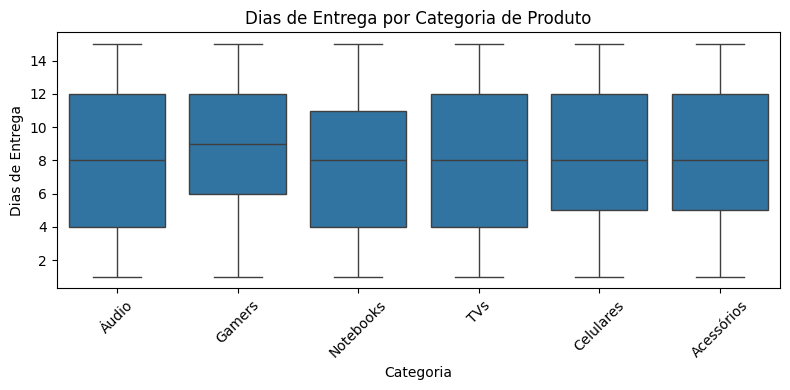

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico 1: Distribuição das avaliações
plt.figure(figsize=(6, 4))
sns.countplot(x='nota_avaliacao', data=df)
plt.title('Distribuição das Avaliações')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()

# Gráfico 2: Boxplot de dias de entrega por categoria
plt.figure(figsize=(8, 4))
sns.boxplot(x='categoria_produto', y='dias_entrega', data=df)
plt.title('Dias de Entrega por Categoria de Produto')
plt.xlabel('Categoria')
plt.ylabel('Dias de Entrega')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Segundo Cenário:
Clínica de Saúde / Consultas Médicas

In [19]:
df2 = pd.read_csv("/content/drive/MyDrive/portfólio_dados/dataset_clinica.csv", sep=';')

df2.head()

,id_paciente,nome_paciente,sexo,idade,data_agendamento,data_consulta,especialidade,medico,compareceu,avaliacao,tempo_espera_min
0,1000,Raul Cardoso,M,4,2025-03-11,2025-03-16,Dermatologia,Dra. Rocha,Sim,1.0,48.0
1,1001,Leandro Oliveira,M,76,2025-04-17,2025-04-20,Cardiologia,Dr. Lima,Sim,2.0,37.0
2,1002,Theo Pereira,M,72,2025-04-30,2025-05-01,Psiquiatria,Dra. Martins,Sim,4.0,19.0
3,1003,Vicente das Neves,F,76,2025-03-07,2025-03-09,Cardiologia,Dra. Rocha,Sim,3.0,22.0
4,1004,Yuri Castro,M,28,2025-03-13,2025-03-15,Cardiologia,Dr. Lima,Sim,3.0,59.0


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_paciente       1000 non-null   int64  
 1   nome_paciente     1000 non-null   object 
 2   sexo              1000 non-null   object 
 3   idade             1000 non-null   int64  
 4   data_agendamento  1000 non-null   object 
 5   data_consulta     1000 non-null   object 
 6   especialidade     1000 non-null   object 
 7   medico            1000 non-null   object 
 8   compareceu        1000 non-null   object 
 9   avaliacao         859 non-null    float64
 10  tempo_espera_min  859 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB


Verificar valores nulos

In [21]:
print(df.isnull().sum())

id_pedido                0
data_pedido              0
id_cliente               0
nome_cliente             0
cidade                   0
estado                   0
categoria_produto        0
nome_produto             0
quantidade               0
preco_unitario           0
preco_total              0
tipo_pagamento           0
dias_entrega             0
nota_avaliacao           0
mes                      0
ano                      0
mes_ano                  0
preco_total_formatado    0
dtype: int64


In [22]:
df2 = df2.dropna()
df2.head()

,id_paciente,nome_paciente,sexo,idade,data_agendamento,data_consulta,especialidade,medico,compareceu,avaliacao,tempo_espera_min
0,1000,Raul Cardoso,M,4,2025-03-11,2025-03-16,Dermatologia,Dra. Rocha,Sim,1.0,48.0
1,1001,Leandro Oliveira,M,76,2025-04-17,2025-04-20,Cardiologia,Dr. Lima,Sim,2.0,37.0
2,1002,Theo Pereira,M,72,2025-04-30,2025-05-01,Psiquiatria,Dra. Martins,Sim,4.0,19.0
3,1003,Vicente das Neves,F,76,2025-03-07,2025-03-09,Cardiologia,Dra. Rocha,Sim,3.0,22.0
4,1004,Yuri Castro,M,28,2025-03-13,2025-03-15,Cardiologia,Dr. Lima,Sim,3.0,59.0


Corrigir os tipos de dados

In [23]:
df2['data_agendamento'] = pd.to_datetime(df2['data_agendamento'], errors='coerce')
df2['data_consulta'] = pd.to_datetime(df2['data_consulta'], errors='coerce')
df2['avaliacao'] = df2['avaliacao'].astype('Int64')  # aceita nulos
df2['tempo_espera_min'] = df2['tempo_espera_min'].astype('Int64')
df2['idade'] = df2['idade'].astype(int)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_paciente       859 non-null    int64         
 1   nome_paciente     859 non-null    object        
 2   sexo              859 non-null    object        
 3   idade             859 non-null    int64         
 4   data_agendamento  859 non-null    datetime64[ns]
 5   data_consulta     859 non-null    datetime64[ns]
 6   especialidade     859 non-null    object        
 7   medico            859 non-null    object        
 8   compareceu        859 non-null    object        
 9   avaliacao         859 non-null    Int64         
 10  tempo_espera_min  859 non-null    Int64         
dtypes: Int64(2), datetime64[ns](2), int64(2), object(5)
memory usage: 114.5+ KB


Total de consultas agendadas, realizadas e abstinência

In [25]:
total_agendadas = len(df2)
total_realizadas = df2[df2['compareceu'] == 'Sim'].shape[0]
total_abstencoes = df2[df2['compareceu'] == 'Não'].shape[0]

print(f"Total de consultas agendadas: {total_agendadas}")
print(f"Total de consultas realizadas: {total_realizadas}")
print(f"Total de abstenções: {total_abstencoes}")

Total de consultas agendadas: 859
Total de consultas realizadas: 859
Total de abstenções: 0


<Axes: ylabel='sexo'>

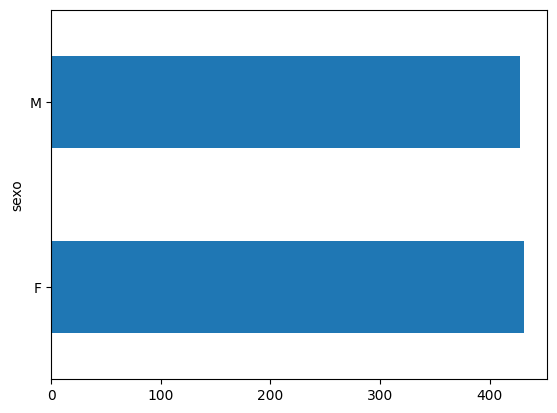

In [32]:
df2.groupby('sexo')['compareceu'].apply(lambda x: (x == 'Sim').sum()).sort_values(ascending=False).plot(kind='barh')

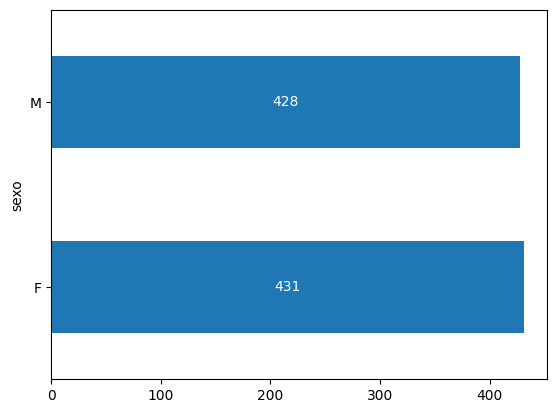

In [33]:
import matplotlib.pyplot as plt

# ... (código anterior) ...

ax = df2.groupby('sexo')['compareceu'].apply(lambda x: (x == 'Sim').sum()).sort_values(ascending=False).plot(kind='barh')

# Adicionar valores dentro das barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(width)}', (x + width/2, y + height/2), ha='center', va='center', color='white')

plt.show()

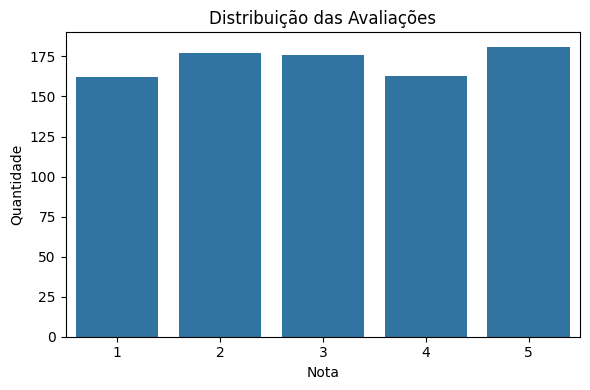

In [34]:
# Gráfico 1: Distribuição das avaliações
plt.figure(figsize=(6, 4))
sns.countplot(x='avaliacao', data=df2)
plt.title('Distribuição das Avaliações')
plt.xlabel('Nota')
plt.ylabel('Quantidade')
plt.tight_layout()
plt.show()